In [4]:
!pip install optuna
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import optuna

# 1. Load the MNIST dataset

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


# 2. Display sample images

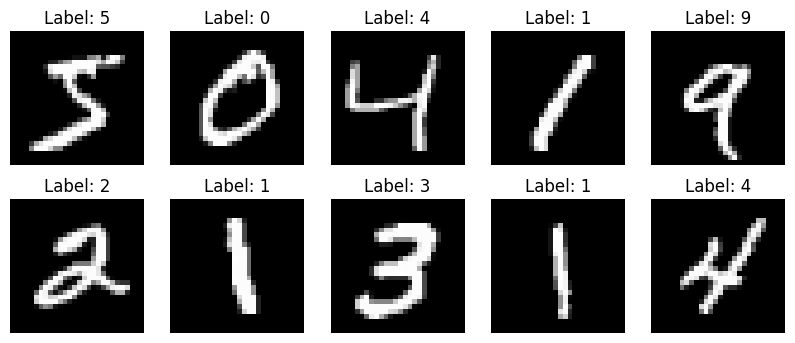

In [8]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

# 3. Normalize data and apply one-hot encoding

In [9]:
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)  # Add channel dimension
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [26]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

# 4. Build a basic MLP model

In [10]:
def build_mlp_model():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [38]:
mlp_model = build_mlp_model()
history = mlp_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7528 - loss: 0.8014 - val_accuracy: 0.9479 - val_loss: 0.1778
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9423 - loss: 0.1976 - val_accuracy: 0.9607 - val_loss: 0.1331
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9580 - loss: 0.1409 - val_accuracy: 0.9647 - val_loss: 0.1146
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9661 - loss: 0.1138 - val_accuracy: 0.9703 - val_loss: 0.0969
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9720 - loss: 0.0915 - val_accuracy: 0.9705 - val_loss: 0.0944
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9748 - loss: 0.0811 - val_accuracy: 0.9725 - val_loss: 0.0834
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9765 - loss: 0.0715 - val_accuracy: 0.9748 - val_loss: 0.0838
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9806 - loss: 0.0632 - val_accuracy: 

# 5. Evaluate MLP model and make predictions

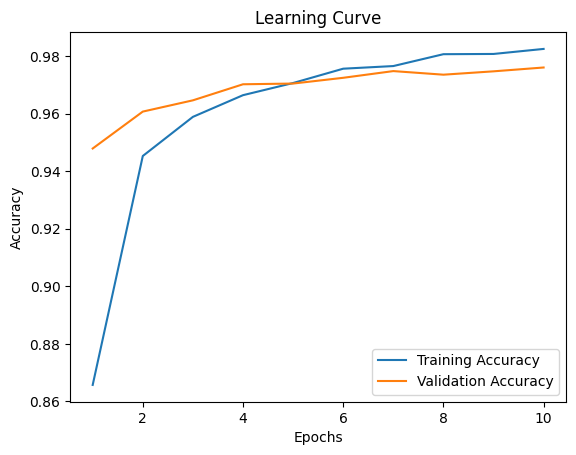

Test Accuracy: 0.9779000282287598


In [39]:

# Define a function to evaluate the model's performance
def evaluate_model(model, x_test, y_test):
  _, accuracy = model.evaluate(x_test, y_test, verbose=0)
  return accuracy

# Extract the training and validation accuracy from the history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the learning curve
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Evaluate the final model on the test set
test_accuracy = evaluate_model(mlp_model, x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

In [33]:
mlp_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

# 6. Optimize MLP hyperparameters using Optuna

In [40]:
def objective_mlp(trial):
    units = trial.suggest_int("units", 64, 256)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)

    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(units, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=0)
    accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
    return accuracy

In [41]:
study = optuna.create_study(direction="maximize")
study.optimize(objective_mlp, n_trials=10)
print("Best MLP hyperparameters:", study.best_params)

[I 2024-10-25 10:32:53,719] A new study created in memory with name: no-name-35882ca8-b9c2-4c90-a7ca-5ed896d0edb2
<ipython-input-40-a451aa02e227>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
[I 2024-10-25 10:33:10,604] Trial 0 finished with value: 0.9696999788284302 and parameters: {'units': 114, 'learning_rate': 0.0018249931266572463}. Best is trial 0 with value: 0.9696999788284302.
[I 2024-10-25 10:33:36,219] Trial 1 finished with value: 0.9668999910354614 and parameters: {'units': 226, 'learning_rate': 0.00034704902380750874}. Best is trial 0 with value: 0.9696999788284302.
[I 2024-10-25 10:33:53,513] Trial 2 finished with value: 0.967199981212616 and parameters: {'units': 175, 'learning_rate': 0.0084837601816954}. Best is trial 0 with value: 0.9696999

Best MLP hyperparameters: {'units': 187, 'learning_rate': 0.001394463431721112}


In [42]:
# Build and train the MLP model with optimized hyperparameters
best_units = study.best_params['units']
best_learning_rate = study.best_params['learning_rate']

optimized_mlp_model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(best_units, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

optimizer = Adam(learning_rate=best_learning_rate)
optimized_mlp_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
optimized_history = optimized_mlp_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8143 - loss: 0.6167 - val_accuracy: 0.9539 - val_loss: 0.1573
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9499 - loss: 0.1647 - val_accuracy: 0.9621 - val_loss: 0.1211
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9672 - loss: 0.1111 - val_accuracy: 0.9724 - val_loss: 0.0948
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9733 - loss: 0.0839 - val_accuracy: 0.9735 - val_loss: 0.0890
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9787 - loss: 0.0683 - val_accuracy: 0.9757 - val_loss: 0.0855
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9812 - loss: 0.0605 - val_accuracy: 0.9755 - val_loss: 0.0862
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9833 - loss: 0.0503 - val_accuracy: 0.9783 - val_loss: 0.0831
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9861 - loss: 0.0429 - val_accuracy:

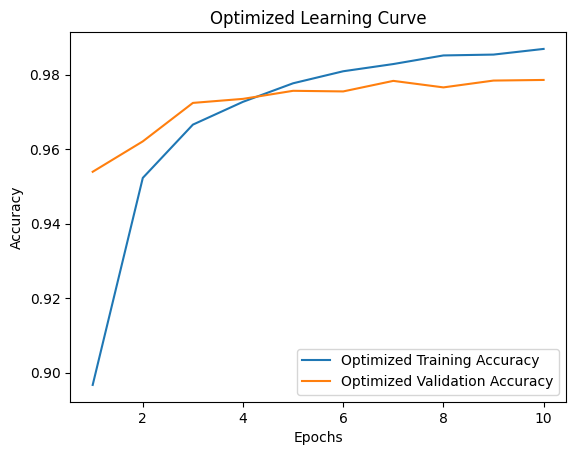

Optimized Test Accuracy: 0.9775000214576721


In [45]:
# Evaluate the optimized MLP model
optimized_test_accuracy = evaluate_model(optimized_mlp_model, x_test, y_test)

# Plot the learning curve for the optimized model
optimized_train_accuracy = optimized_history.history['accuracy']
optimized_val_accuracy = optimized_history.history['val_accuracy']

plt.plot(range(1, len(optimized_train_accuracy) + 1), optimized_train_accuracy, label='Optimized Training Accuracy')
plt.plot(range(1, len(optimized_val_accuracy) + 1), optimized_val_accuracy, label='Optimized Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Optimized Learning Curve')
plt.legend()
plt.show()

print(f"Optimized Test Accuracy: {optimized_test_accuracy}")

In [44]:
optimized_mlp_model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 187)                 │         146,795 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 187)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 64)                  │          12,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 478,433 (1.83 MB)

 Trainable params: 159,477 (622.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 318,956 (1.22 MB)

# 7. Build a basic CNN model

In [5]:
def build_cnn_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
cnn_model = build_cnn_model()
history_cnn = cnn_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 154ms/step - accuracy: 0.7689 - loss: 0.7177 - val_accuracy: 0.9788 - val_loss: 0.0745
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 58s 156ms/step - accuracy: 0.9633 - loss: 0.1246 - val_accuracy: 0.9857 - val_loss: 0.0506
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 153ms/step - accuracy: 0.9751 - loss: 0.0840 - val_accuracy: 0.9878 - val_loss: 0.0444
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 56s 150ms/step - accuracy: 0.9800 - loss: 0.0679 - val_accuracy: 0.9881 - val_loss: 0.0410
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 146ms/step - accuracy: 0.9820 - loss: 0.0587 - val_accuracy: 0.9883 - val_loss: 0.0405
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 56s 151ms/step - accuracy: 0.9837 - loss: 0.0516 - val_accuracy: 0.9884 - val_loss: 0.0402
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 149ms/step - accuracy: 0.9865 - loss: 0.0434 - val_accuracy: 0.9899 - val_loss: 0.0342
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 152ms/step - accuracy: 0.9869 - loss: 0

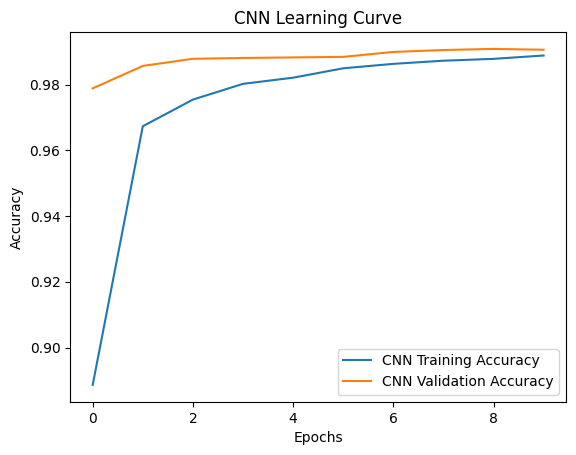

CNN Test Accuracy: 0.9929999709129333


In [12]:

# Plot the learning curve for the CNN model
plt.plot(history_cnn.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Learning Curve')
plt.legend()
plt.show()

# Evaluate the CNN model on the test set
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test, verbose=0)
print("CNN Test Accuracy:", cnn_test_acc)

